## Regression Problem

#### Diagnosis Prediction

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (16, 9))
sns.set(rc = {'figure.figsize':(16,9)})
# p = sns.lineplot(data = df, legend = True)

<Figure size 1152x648 with 0 Axes>

In [43]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


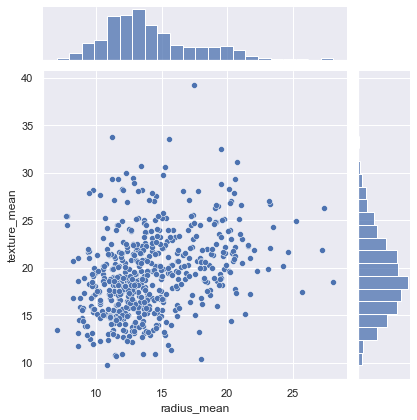

In [44]:
sns.jointplot('radius_mean', 'texture_mean', data = df)
None

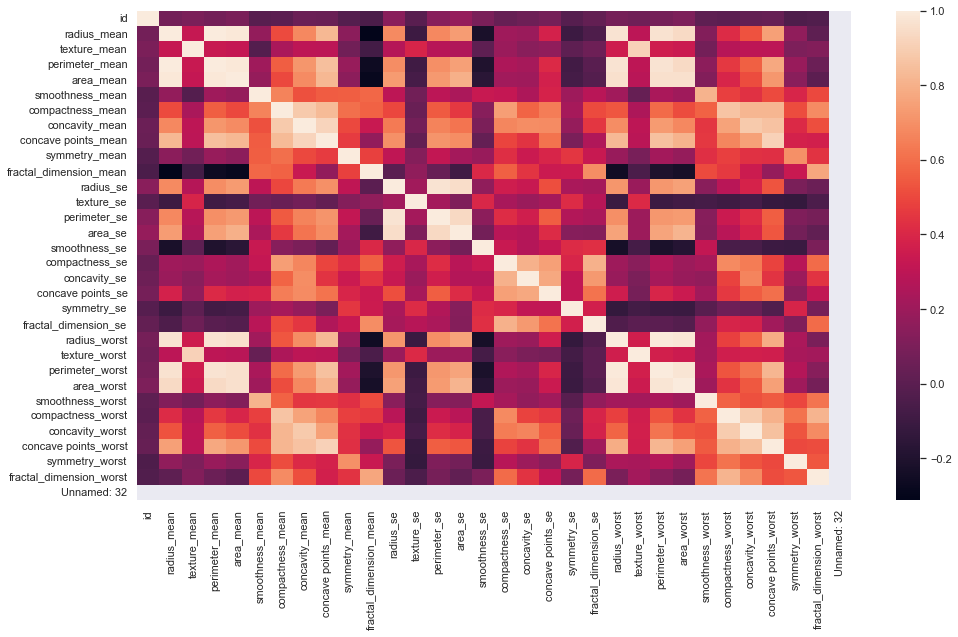

In [83]:
sns.heatmap(df.corr())
None

### Target = diagnosis

In [73]:
# Nulls 

df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [76]:
# Baseline 
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [89]:
X = df[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']] # First four features only

y = df['diagnosis'] # target variable

In [90]:
X.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
0,25.38,17.33,184.60,2019.0,0.1622
1,24.99,23.41,158.80,1956.0,0.1238
2,23.57,25.53,152.50,1709.0,0.1444
3,14.91,26.50,98.87,567.7,0.2098
4,22.54,16.67,152.20,1575.0,0.1374


In [91]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [68]:
from sklearn.linear_model import LogisticRegression
# Create an object
logModel = LogisticRegression()

# Fit the model
logModel.fit(X_train, y_train)

LogisticRegression()

In [84]:
# Precict 
y_pred = logModel.predict(X_test)
print(y_pred)

['B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B'
 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B']


In [85]:
# Import classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.94      0.99      0.97       103
           M       0.98      0.91      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### Conclusion
Malignant cancer predicted with 98% accuracy and Benign predicted with 94% accuracy

